In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# TASK 1
train_df = pd.read_csv('DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice.csv')
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.set_index('date', inplace= True)
train_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [3]:
test_df = pd.read_csv('DS3_C1_S4_DailyDelhiClimateTest_Data_Practice.csv')
test_df['date'] = pd.to_datetime(test_df['date'])
test_df.set_index('date', inplace= True)
test_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [4]:
df = pd.concat([train_df, test_df])
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


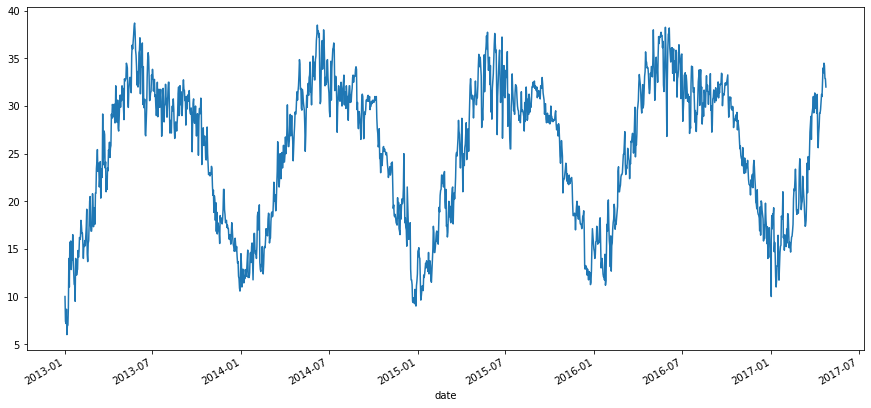

In [5]:
df['meantemp'].plot(figsize=(15,7))
plt.show()

In [6]:
df_mt= df['meantemp']
df_mt

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2017-04-20    34.500000
2017-04-21    34.250000
2017-04-22    32.900000
2017-04-23    32.875000
2017-04-24    32.000000
Name: meantemp, Length: 1576, dtype: float64

In [7]:
ss = int(0.7 * len(df_mt))

train = df_mt.iloc[:ss]
test = df_mt.iloc[ss:]

print('Train : ',len(train),'\t\t Test : ',len(test))

Train :  1103 		 Test :  473


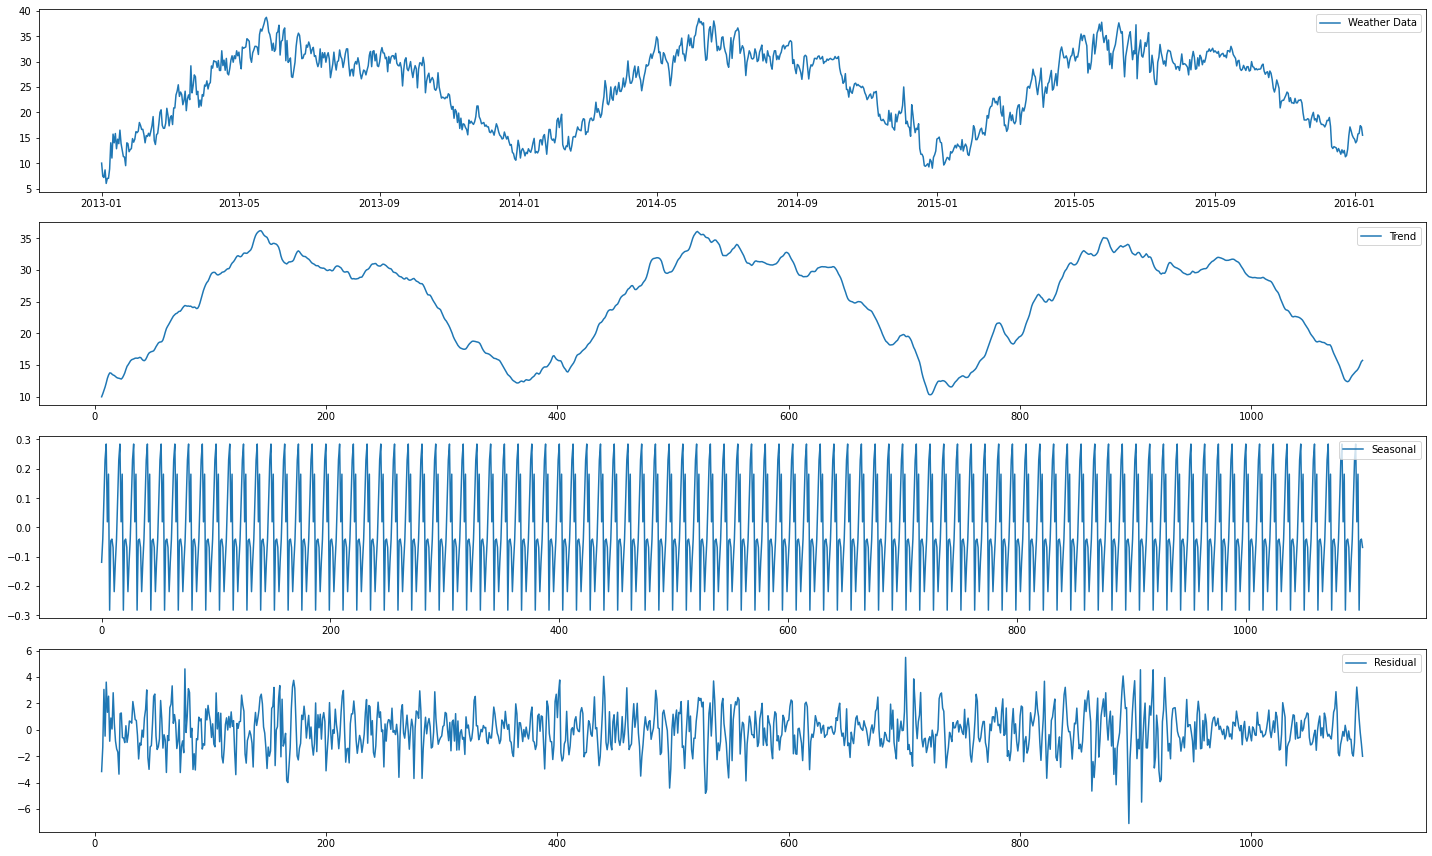

In [8]:
decomposition = seasonal_decompose(np.asarray(train), freq=12)

d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(train,label='Weather Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In [9]:
lags = 20

moving_avg = train.rolling(window=lags).mean()

df_ts = pd.DataFrame({'Actual':train, 'MA':moving_avg})
df_ts

,Actual,MA
date,,
2013-01-01,10.000000,NaN
2013-01-02,7.400000,NaN
2013-01-03,7.166667,NaN
2013-01-04,8.666667,NaN
2013-01-05,6.000000,NaN
...,...,...
2016-01-04,15.750000,13.654464
2016-01-05,15.833333,13.796131
2016-01-06,17.375000,14.052381


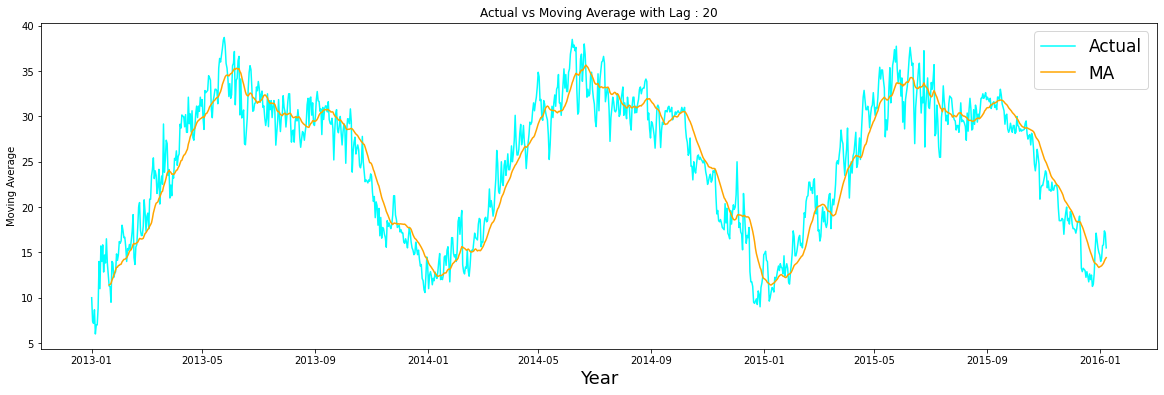

In [10]:
plt.figure(figsize=(20,6))
plt.plot(df_ts.Actual, color='cyan', label='Actual')
plt.plot(df_ts.MA,  color='orange', label='MA')
plt.title('Actual vs Moving Average with Lag : ' +str(lags))
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Moving Average')
plt.legend(fontsize = 17)
plt.show()

In [11]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)
    return msg

In [12]:
print(checkStationarity(train))

pvalue=0.28291649636396793. Data is not Stationary. Make the data stationary before model building


In [13]:
diff_df = train - train.shift()   
print(diff_df)

date
2013-01-01         NaN
2013-01-02   -2.600000
2013-01-03   -0.233333
2013-01-04    1.500000
2013-01-05   -2.666667
                ...   
2016-01-04    1.375000
2016-01-05    0.083333
2016-01-06    1.541667
2016-01-07   -0.250000
2016-01-08   -1.625000
Name: meantemp, Length: 1103, dtype: float64


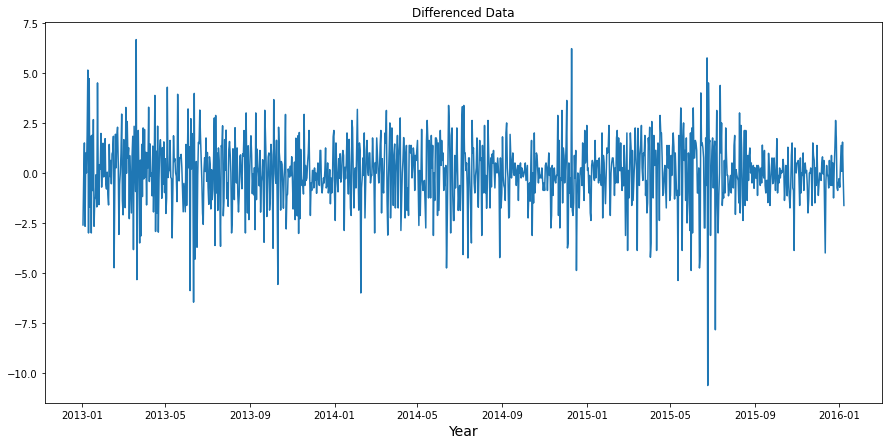

In [14]:
plt.subplots(figsize=(15,7))
plt.plot(diff_df)  
plt.title('Differenced Data')
plt.xlabel('Year', fontsize=14)
plt.show()

In [37]:
print(checkStationarity(diff_df))

pvalue=3.8921150383089976e-23. Data is Stationary. Proceed to model building


In [15]:
print('Before removing numm values : ',len(diff_df))
diff_df.dropna(inplace=True)
print('After removing null value : ',len(diff_df))
diff_df

Before removing numm values :  1103
After removing null value :  1102


date
2013-01-02   -2.600000
2013-01-03   -0.233333
2013-01-04    1.500000
2013-01-05   -2.666667
2013-01-06    1.000000
                ...   
2016-01-04    1.375000
2016-01-05    0.083333
2016-01-06    1.541667
2016-01-07   -0.250000
2016-01-08   -1.625000
Name: meantemp, Length: 1102, dtype: float64

In [16]:
print(checkStationarity(diff_df))

pvalue=3.8921150383089976e-23. Data is Stationary. Proceed to model building


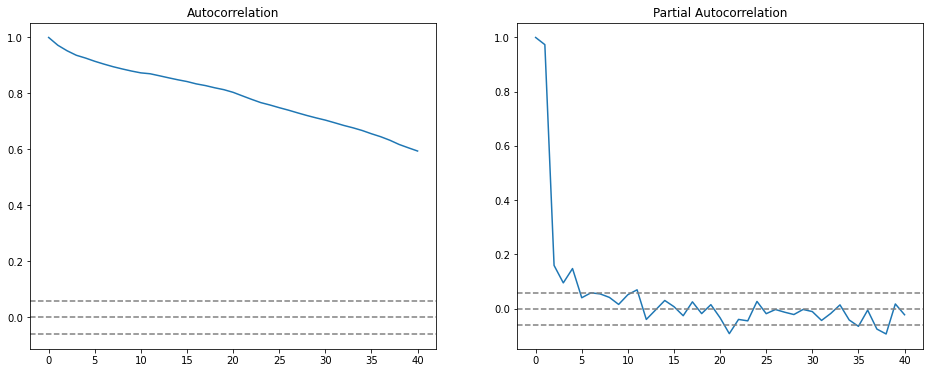

In [17]:
lag_pcf = acf(train, nlags=40)
lag_pacf = pacf(train, nlags=40, method='ols')

# For ACF

fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(121)
plt.plot(lag_pcf)
plt.title('Autocorrelation')
plt.axhline(y= -1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y= 0 , linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(train)), linestyle='--', color='gray')

# For PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation')
plt.axhline(y= -1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y= 0, linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.show()

In [18]:
# TASK 2
m = auto_arima(train,start_p=0,max_p=2, start_q=0,max_q=2, seasonal=False, trace=True)
print(m.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10318.448, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8909.412, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4230.618, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4194.242, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4196.063, Time=0.68 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4212.984, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4192.797, Time=1.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4224.827, Time=0.50 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4233.022, Time=0.51 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4194.792, Time=1.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4259.479, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4209.747, Time=0.71 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] inter

In [19]:
p=[1,2,3]; d=[1,2,3]; q=[1,2,3]

for x in p:
    for y in d:
        for z in q: 
            m1 = ARIMA(train, order=(x,y,z)).fit()
            print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1103
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2088.973
Date:                Thu, 28 Apr 2022   AIC                           4183.946
Time:                        12:58:46   BIC                           4198.961
Sample:                    01-01-2013   HQIC                          4189.626
                         - 01-08-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5664      0.054     10.581      0.000       0.461       0.671
ma.L1         -0.7943      0.043    -18.511      0.000      -0.878      -0.710
sigma2         2.5940      0.080     32.235      0.0

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1103
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -2110.068
Date:                Thu, 28 Apr 2022   AIC                           4230.136
Time:                        12:58:51   BIC                           4255.156
Sample:                    01-01-2013   HQIC                          4239.601
                         - 01-08-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.005   -206.922      0.000      -1.009      -0.991
ma.L1         -0.2259      0.110     -2.058      0.040      -0.441      -0.011
ma.L2         -0.9998      0.044    -22.911      0.0

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1103
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2087.951
Date:                Thu, 28 Apr 2022   AIC                           4185.901
Time:                        12:58:56   BIC                           4210.926
Sample:                    01-01-2013   HQIC                          4195.367
                         - 01-08-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1915      0.283     -0.678      0.498      -0.745       0.362
ar.L2          0.4666      0.138      3.369      0.001       0.195       0.738
ma.L1         -0.0488      0.285     -0.171      0.8

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1103
Model:                 ARIMA(2, 3, 1)   Log Likelihood               -2344.063
Date:                Thu, 28 Apr 2022   AIC                           4696.126
Time:                        12:59:03   BIC                           4716.138
Sample:                    01-01-2013   HQIC                          4703.697
                         - 01-08-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7198      0.024    -29.748      0.000      -0.767      -0.672
ar.L2         -0.3276      0.027    -12.002      0.000      -0.381      -0.274
ma.L1         -1.0000      2.034     -0.492      0.6

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1103
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2086.439
Date:                Thu, 28 Apr 2022   AIC                           4186.877
Time:                        12:59:09   BIC                           4221.912
Sample:                    01-01-2013   HQIC                          4200.130
                         - 01-08-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3031      0.484     -0.626      0.532      -1.253       0.646
ar.L2          0.2119      0.232      0.914      0.361      -0.242       0.666
ar.L3          0.0874      0.277      0.315      0.7

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1103
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -2104.619
Date:                Thu, 28 Apr 2022   AIC                           4221.239
Time:                        12:59:18   BIC                           4251.257
Sample:                    01-01-2013   HQIC                          4232.595
                         - 01-08-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2019      0.024     -8.321      0.000      -0.249      -0.154
ar.L2         -0.1307      0.028     -4.620      0.000      -0.186      -0.075
ar.L3         -0.1523      0.030     -5.126      0.0

In [57]:
p=3; q=2; d=0
m2 = ARIMA(train, order=(p,d,q)).fit()
print(m2.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1103
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -2090.389
Date:                Thu, 28 Apr 2022   AIC                           4194.778
Time:                        14:37:51   BIC                           4229.818
Sample:                    01-01-2013   HQIC                          4208.032
                         - 01-08-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3255      4.086      5.219      0.000      13.317      29.334
ar.L1          0.7890      0.277      2.846      0.004       0.246       1.332
ar.L2          0.6726      0.391      1.719      0.0

In [58]:
strt = len(train)
end = len(train) + len(test) - 1

print('Start : ',strt,'End : ',end)

prediction = m2.predict(strt, end, typ='levels')
prediction

Start :  1103 End :  1575


2016-01-09    15.623864
2016-01-10    15.692024
2016-01-11    15.754223
2016-01-12    15.791556
2016-01-13    15.831157
                ...    
2017-04-21    20.651173
2017-04-22    20.654212
2017-04-23    20.657236
2017-04-24    20.660247
2017-04-25    20.663245
Freq: D, Name: predicted_mean, Length: 473, dtype: float64

In [59]:
pvalue = sm.stats.acorr_ljungbox(m2.resid, lags=[1], return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [60]:
actual=[]; pred=[]

for i in range(len(prediction)):
    actual.append(test[i])
    pred.append(prediction[i])

df_final1 = pd.DataFrame({'Actual':actual, 'Predicted':pred})
df_final1['Error'] = df_final1['Actual'] - df_final1['Predicted']
df_final1

,Actual,Predicted,Error
0,15.857143,15.623864,0.233278
1,15.625000,15.692024,-0.067024
2,15.750000,15.754223,-0.004223
3,18.000000,15.791556,2.208444
4,18.266667,15.831157,2.435509
...,...,...,...
468,34.500000,20.651173,13.848827
469,34.250000,20.654212,13.595788
470,32.900000,20.657236,12.242764
471,32.875000,20.660247,12.214753


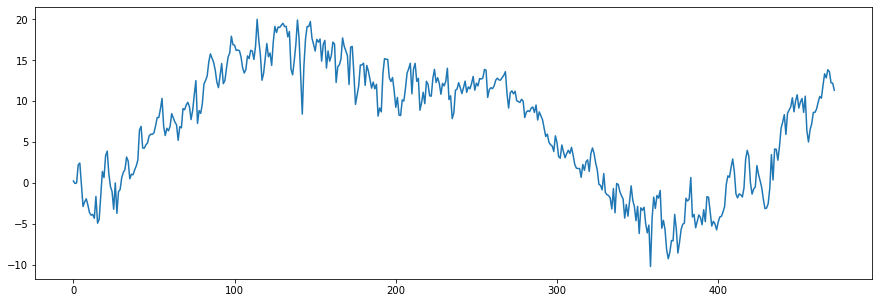

In [61]:
plt.subplots(figsize=(15,5))
plt.plot(df_final1.Error)
plt.show()

In [62]:
p=2; q=1; d=1

print('ARIMA model - Order = (',p,',',d,',',q,')')

mse = mean_squared_error(df_final1.Actual, df_final1.Predicted)

print("\nMSE : ",mse)
print('\nRMSE : ',np.sqrt(mse))

ARIMA model - Order = ( 2 , 1 , 1 )

MSE :  101.11181326010201

RMSE :  10.055436999956889


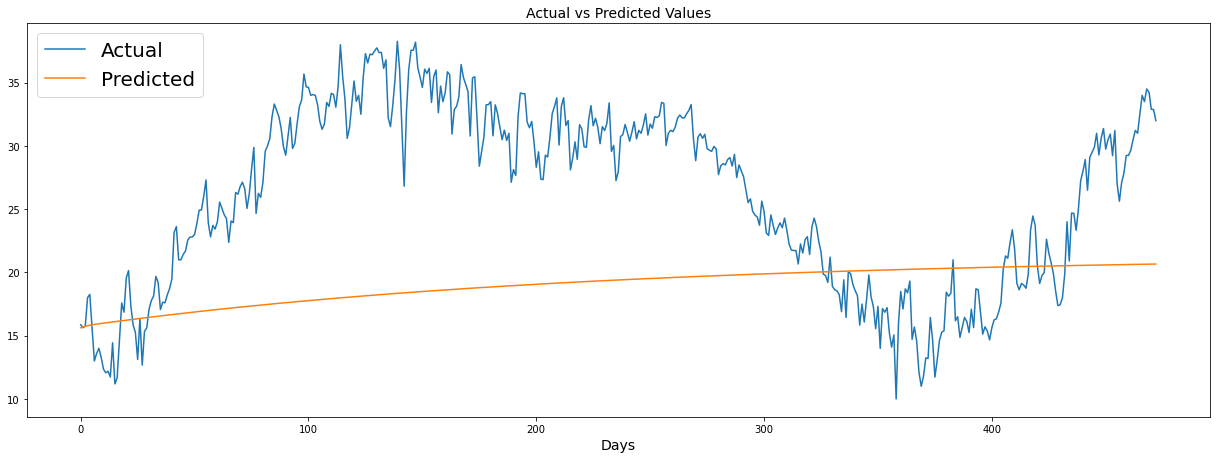

In [63]:
plt.subplots(figsize=(17,6))
plt.plot(df_final1.Actual, label='Actual')  
plt.plot(df_final1.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.show()

In [66]:
# TASK 3
p=3; q=2; d=2

m3 = sm.tsa.statespace.SARIMAX(df_mt, order=(p,d,q), seasonal_order=(p,d,q,12)).fit()
m3

In [65]:
prediction = m3.predict(start=1103, end=1575, dynamic=True)
prediction

MemoryError: Unable to allocate 253. MiB for an array with shape (265, 265, 473) and data type float64

In [ ]:
df_res = pd.DataFrame({'Actual':df_mt[1103:], 'Predicted':prediction})
df_res['Error'] = df_res.Actual - df_res.Predicted
df_res

In [ ]:
print('MSE : ',mean_squared_error(df_res.Actual , df_res.Predicted))

In [ ]:
plt.subplots(figsize=(17,6))
plt.plot(df_res.Actual, label='Actual')  
plt.plot(df_res.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.show()

In [52]:
# TASK 4
ss = int(0.9 * len(df_mt))

train1 = df.iloc[:ss]
test1 = df.iloc[ss:]

print('Train1 : ',len(train),'\t\t Test1 : ',len(test))

Train1 :  1103 		 Test1 :  473


In [53]:
exog_train = train1[['humidity','wind_speed','meanpressure']]
exog_test = test1[['humidity','wind_speed','meanpressure']]

print(exog_train.head())
print('\n',exog_test.head())

             humidity  wind_speed  meanpressure
date                                           
2013-01-01  84.500000    0.000000   1015.666667
2013-01-02  92.000000    2.980000   1017.800000
2013-01-03  87.000000    4.633333   1018.666667
2013-01-04  71.333333    1.233333   1017.166667
2013-01-05  86.833333    3.700000   1016.500000

              humidity  wind_speed  meanpressure
date                                           
2016-11-19  60.666667    2.840000   1012.466667
2016-11-20  59.900000    2.505000   1013.350000
2016-11-21  60.461538    2.715385   1013.000000
2016-11-22  50.157895    8.000000   1012.894737
2016-11-23  51.434783    6.604348   1013.173913


In [54]:
model = SARIMAX(train1['meantemp'], order=(3,2,2), seasonal_order=(1,0,0,30), exog = exog_train.values).fit()
model

In [55]:
forecast  =model.forecast(len(test1), exog=exog_test.values)
forecast

2016-11-19    20.661564
2016-11-20    20.548457
2016-11-21    20.282473
2016-11-22    21.402087
2016-11-23    21.085685
                ...    
2017-04-21    -3.145554
2017-04-22    -5.018122
2017-04-23    -5.464155
2017-04-24    -3.811929
2017-04-25    -4.002910
Freq: D, Name: predicted_mean, Length: 158, dtype: float64

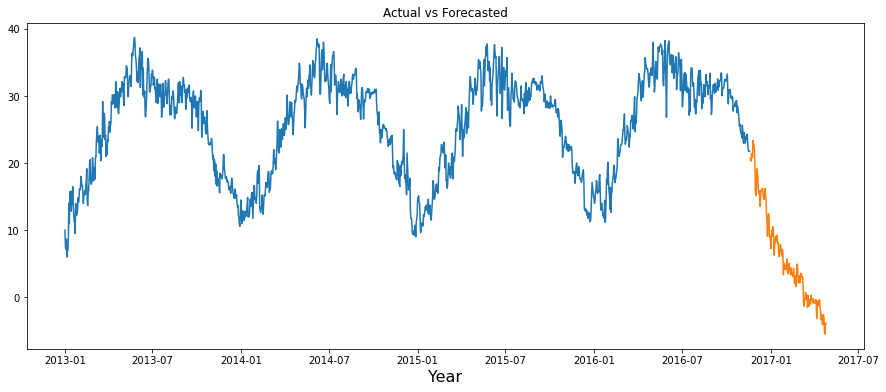

In [56]:
plt.figure(figsize=(15,6))
plt.plot(train1['meantemp'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('Actual vs Forecasted')
plt.xlabel('Year', fontsize=16)
plt.show()